<a href="https://colab.research.google.com/github/dingBatman01/prac-class/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Practicing dpylr and ggplot

In [ ]:
install.packages("nycflights13")

In [ ]:
library(nycflights13)

In [ ]:
library(tidyverse)

In [ ]:
flights %>% filter(month == 10 & day == 10 & dest %in% c("ORD", "LAS"))

In [ ]:
arrange(flights, year, month, dep_time, day) %>% head(10)

In [ ]:
select(flights, -c(year, month, day)) %>% head()

dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


In [ ]:
rename(flights, tail_num = colnames(flights)[12]) %>% head()

In [ ]:
colnames(flights)

In [ ]:
flights %>%
  select(year:day, ends_with("delay"), air_time) %>%
  mutate(gain = dep_delay - arr_delay,
          hours = air_time / 60,
          gain_per_hour = gain / hours) %>%
  head() -> flight_new
  flight_new

year,month,day,dep_delay,arr_delay,air_time,gain,hours,gain_per_hour
<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2013,1,1,2,11,227,-9,3.783333,-2.378855
2013,1,1,4,20,227,-16,3.783333,-4.229075
2013,1,1,2,33,160,-31,2.666667,-11.625000
2013,1,1,-1,-18,183,17,3.050000,5.573770
2013,1,1,-6,-25,116,19,1.933333,9.827586
2013,1,1,-4,12,150,-16,2.500000,-6.400000


In [ ]:
flights %>%
    group_by(origin) %>%
    summarise(delay = mean(dep_delay, na.rm=T),
              delay_sd = sd(dep_delay, na.rm=T),
              n =n())

origin,delay,delay_sd,n
<chr>,<dbl>,<dbl>,<int>
EWR,15.10795,41.32370,120835
JFK,12.11216,39.03507,111279
LGA,10.34688,39.99302,104662


In [ ]:
flights %>%
  group_by(dest) %>%
  summarise(count = n(),
            dist = mean(distance, na.rm=T),
            delay = mean(arr_delay, na.rm=T)) %>%
  filter(count > 20, dest !="HNL") %>% head()

dest,count,dist,delay
<chr>,<int>,<dbl>,<dbl>
ABQ,254,1826.0000,4.381890
ACK,265,199.0000,4.852273
ALB,439,143.0000,14.397129
ATL,17215,757.1082,11.300113
AUS,2439,1514.2530,6.019909
AVL,275,583.5818,8.003831


Warning message:
“The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 7. Consider
specifying shapes manually if you must have them.”
Warning message:
“Removed 62 rows containing missing values (geom_point).”


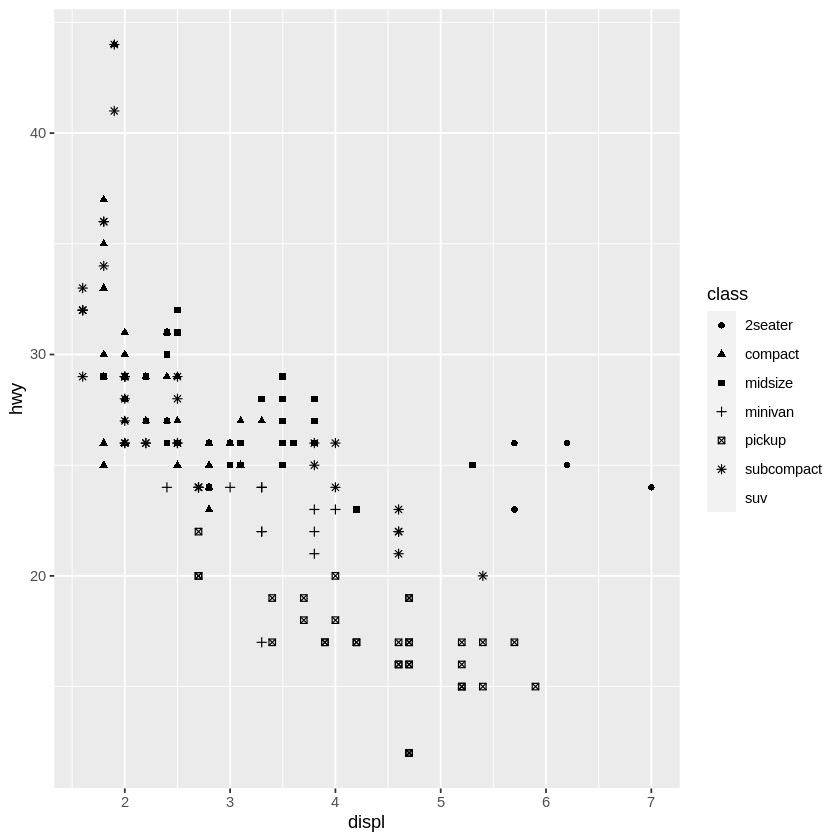

In [ ]:
ggplot(mpg, aes(x=displ, y=hwy, shape = class)) +
  geom_point()

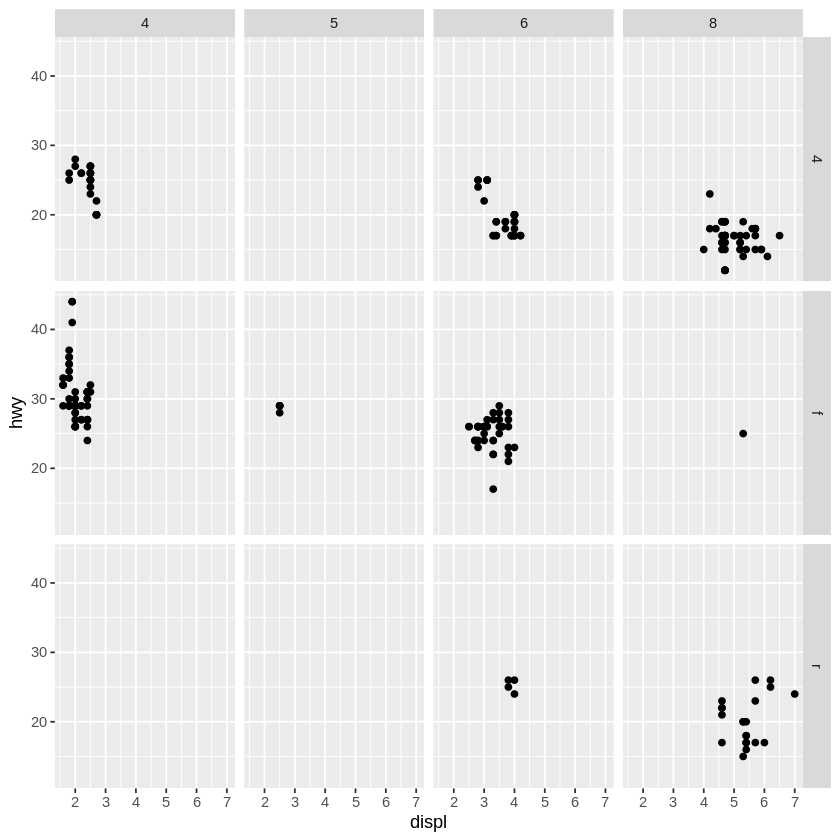

In [ ]:
ggplot(mpg, aes(displ, hwy)) +
geom_point() +
facet_grid(drv~cyl)


## Trying to find meaningful stuff

In [ ]:
head(flights, 20)
summary(flights)

In [ ]:
?flights
colnames(flights)

[1] "year"           "month"          "day"            "dep_time"      
 [5] "sched_dep_time" "dep_delay"      "arr_time"       "sched_arr_time"
 [9] "arr_delay"      "carrier"        "flight"         "tailnum"       
[13] "origin"         "dest"           "air_time"       "distance"      
[17] "hour"           "minute"         "time_hour"

In [ ]:
flights %>%
    select(distance, carrier, ends_with("delay"), ends_with("time")) %>%
    mutate(t_delay = dep_delay + arr_delay) -> flights2

flights2 %>%
    group_by(carrier) %>%
    summarise(mean_delay = (mean(t_delay, na.rm = T))) %>%
    arrange(desc(mean_delay)) -> flights_final

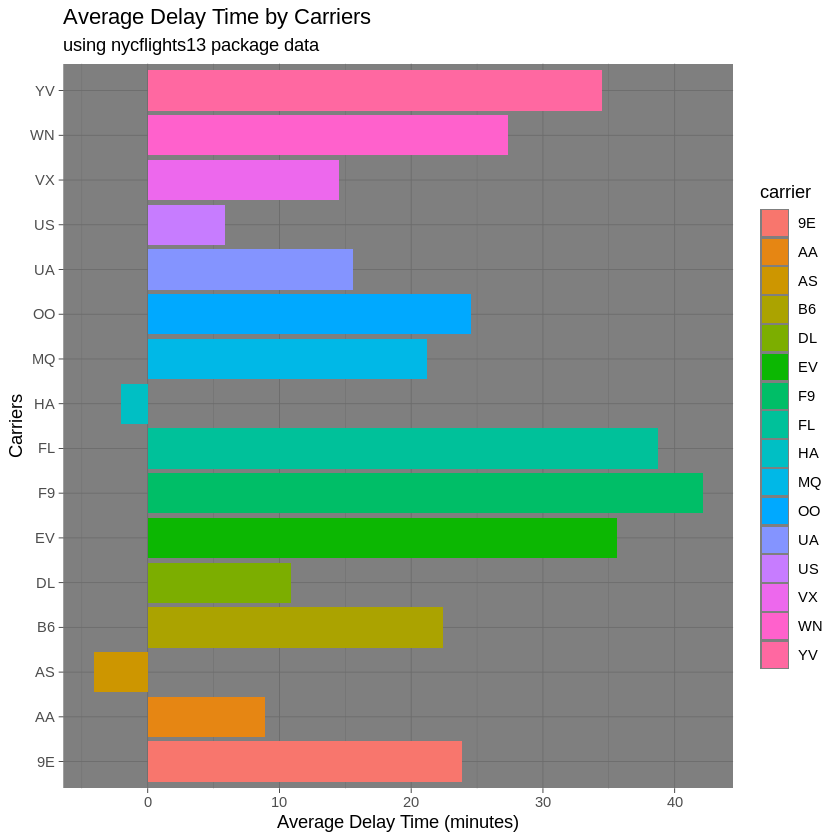

In [20]:
ggplot(flights_final, aes(carrier, mean_delay, fill = carrier)) +
  geom_col() +
  labs(title = "Average Delay Time by Carriers",
        subtitle = "using nycflights13 package data",
        x = "Carriers",
        y = "Average Delay Time (minutes)") +
        coord_flip() +
        theme_dark()

There are carriers that only have flights from one origin and others have flights from all 3 airports in NY. But I did not put that in consideration. I just use the mean of total delay time by each carrier and made this graph.